### **Understanding Data Encoding in Feature Engineering (Beginner-Friendly)**

When working with machine learning models, we often encounter categorical data—data that consists of labels or categories instead of numerical values. However, machine learning models work best with numbers, so we need to **convert categorical data into numerical form** using **data encoding** techniques.

## **Why is Data Encoding Important?**
- Machine learning models require numerical input, and categorical values must be transformed into numbers.
- Proper encoding helps models understand relationships between categories.
- Different encoding techniques are suitable for different types of categorical data.

## **Types of Data Encoding**
There are multiple encoding techniques, each suited to different situations.

### **1. One-Hot Encoding**
- Converts each unique category into a separate binary (0 or 1) column.
- Best for **nominal (unordered) categories** with a small number of unique values.

#### **Example:**
| Color  | One-Hot Encoding |
|--------|-----------------|
| Red    | (1,0,0)         |
| Blue   | (0,1,0)         |
| Green  | (0,0,1)         |

```python
import pandas as pd
df = pd.DataFrame({'Color': ['Red', 'Blue', 'Green']})
df_encoded = pd.get_dummies(df, columns=['Color'])
print(df_encoded)
```

📌 **Use When:** The categorical variable has a small number of unique values.

---

### **2. Label Encoding**
- Assigns each category a unique integer.
- Suitable for **ordinal categories** where order matters (e.g., Low, Medium, High).

#### **Example:**
| Size   | Label Encoding |
|--------|---------------|
| Small  | 0             |
| Medium | 1             |
| Large  | 2             |

```python
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Size_Encoded'] = encoder.fit_transform(df['Size'])
```

📌 **Use When:** There is a natural order between categories (e.g., education levels, rankings).

---

### **3. Ordinal Encoding**
- Similar to Label Encoding but allows us to **manually specify the order**.

#### **Example (Manually Assigning Order):**
| Education | Ordinal Encoding |
|-----------|-----------------|
| High School | 1             |
| Bachelor's  | 2             |
| Master's    | 3             |

```python
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['High School', "Bachelor's", "Master's"]])
df['Education_Encoded'] = encoder.fit_transform(df[['Education']])
```

📌 **Use When:** The categories follow a meaningful ranking.

---

### **4. Frequency Encoding**
- Replaces each category with its frequency (count) in the dataset.
- Helps when there are many unique categories.

#### **Example:**
| City     | Count | Frequency Encoding |
|----------|-------|-------------------|
| New York | 100   | 100               |
| London   | 80    | 80                |
| Tokyo    | 120   | 120               |

```python
df['City_Freq'] = df['City'].map(df['City'].value_counts())
```

📌 **Use When:** The category's frequency might be an important feature.

---

### **5. Target Encoding (Mean Encoding)**
- Replaces categories with the mean of the target variable.
- Best for situations where the categorical feature has a strong correlation with the target.

#### **Example:**
| Product | Target (Sales) | Mean Encoding |
|---------|--------------|--------------|
| A       | 100          | 120          |
| A       | 140          | 120          |
| B       | 200          | 200          |

```python
df['Product_Encoded'] = df.groupby('Product')['Sales'].transform('mean')
```

📌 **Use When:** The categorical feature influences the target variable.

---

### **6. Binary Encoding**
- Converts categories into binary format and encodes them into separate columns.
- More memory-efficient than One-Hot Encoding for high-cardinality categorical data.

#### **Example (for 4 categories):**
| Category | Binary | Encoded Columns |
|----------|--------|----------------|
| A        | 00     | (0,0)          |
| B        | 01     | (0,1)          |
| C        | 10     | (1,0)          |
| D        | 11     | (1,1)          |

```python
from category_encoders import BinaryEncoder
encoder = BinaryEncoder(cols=['Category'])
df_encoded = encoder.fit_transform(df)
```

📌 **Use When:** The dataset has many unique categories (high cardinality).

---

### **Choosing the Right Encoding Technique**
| Encoding Type       | Suitable For              | Pros                          | Cons                          |
|---------------------|--------------------------|-------------------------------|-------------------------------|
| **One-Hot Encoding** | Small categorical values (Nominal) | Simple, widely used | Creates too many columns if categories are large |
| **Label Encoding**  | Ordered categories (Ordinal) | Efficient, small memory | Can mislead models into thinking numbers imply order |
| **Ordinal Encoding** | Categories with order | Respects order | Requires prior knowledge of order |
| **Frequency Encoding** | Many unique categories | Compact representation | Can lead to overfitting |
| **Target Encoding** | Categorical with strong target correlation | Keeps relationship with target | Can introduce data leakage |
| **Binary Encoding** | High-cardinality categories | Efficient with many categories | Not as interpretable |

### **Final Tip:**
Before choosing an encoding method, **analyze the data** and **understand the nature of the categories**. The right encoding technique can **improve model performance** while avoiding unnecessary complexity.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df[["sex", "class", "embark_town"]].isna().sum()

sex            0
class          0
embark_town    2
dtype: int64

In [5]:
df = df.dropna(subset=['embark_town'])

In [6]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
df[["sex", "class", "embark_town"]].isna().sum()

sex            0
class          0
embark_town    0
dtype: int64

In [8]:
# one hot encoding

In [9]:
df['sex'].value_counts()

sex
male      577
female    312
Name: count, dtype: int64

In [10]:
df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [11]:
df['class'].value_counts()

class
Third     491
First     214
Second    184
Name: count, dtype: int64

In [12]:
df_onehot = pd.get_dummies(df, columns=["sex", "embark_town"], drop_first=True)  # Avoid dummy variable trap

In [13]:
df_onehot

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,S,Third,man,True,NaN,no,False,True,False,True
1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,yes,False,False,False,False
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,NaN,yes,True,False,False,True
3,1,1,35.0,1,0,53.1000,S,First,woman,False,C,yes,False,False,False,True
4,0,3,35.0,0,0,8.0500,S,Third,man,True,NaN,no,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,Second,man,True,NaN,no,True,True,False,True
887,1,1,19.0,0,0,30.0000,S,First,woman,False,B,yes,True,False,False,True
888,0,3,NaN,1,2,23.4500,S,Third,woman,False,NaN,no,False,False,False,True
889,1,1,26.0,0,0,30.0000,C,First,man,True,C,yes,True,True,False,False


In [14]:
# label encoder

In [15]:
label_encoder = LabelEncoder()

In [16]:
df_label = df.copy()

In [17]:
df_label["sex"] = label_encoder.fit_transform(df_label["sex"])

In [18]:
df_label

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [19]:
# ordinal encoding

In [20]:
orth_class_order = ["Third", "Second", "First"]  # Define order

In [21]:
ordinal_encoder = OrdinalEncoder(categories=[orth_class_order])

In [22]:
df_ordinal = df.copy()

In [23]:
df_ordinal["class"] = ordinal_encoder.fit_transform(df_ordinal[["class"]])

In [24]:
df_ordinal

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,0.0,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,2.0,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,0.0,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,2.0,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,0.0,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1.0,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,2.0,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,0.0,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,2.0,man,True,C,Cherbourg,yes,True


<Axes: title={'center': 'One-Hot Encoded'}>

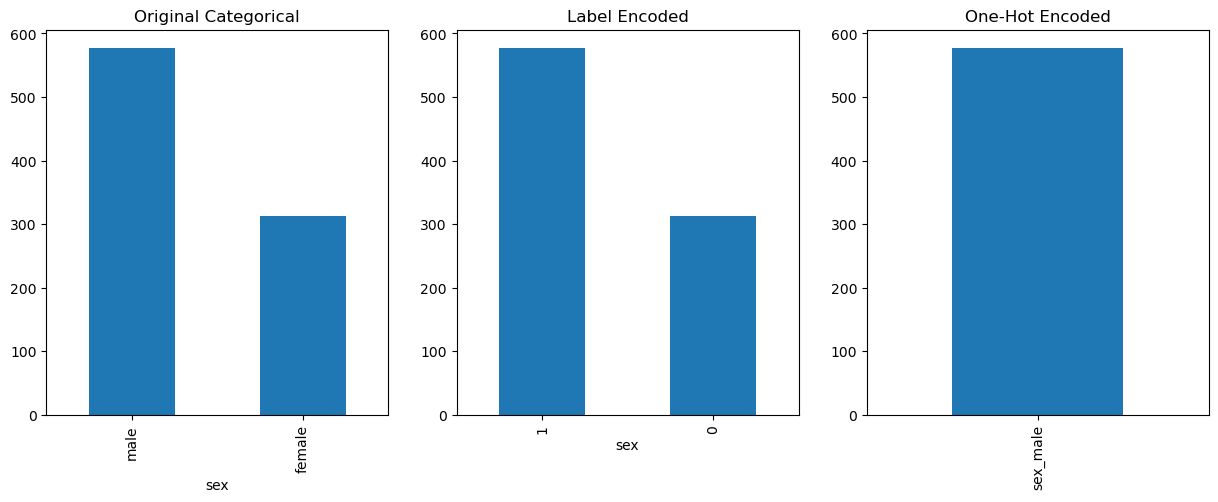

In [25]:
# Visualization to see the effect of encoding
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
df["sex"].value_counts().plot(kind="bar", ax=axes[0], title="Original Categorical")
df_label["sex"].value_counts().plot(kind="bar", ax=axes[1], title="Label Encoded")
df_onehot[["sex_male"]].sum().plot(kind="bar", ax=axes[2], title="One-Hot Encoded")